## **2. Vector Error Correction Model (VECM)**

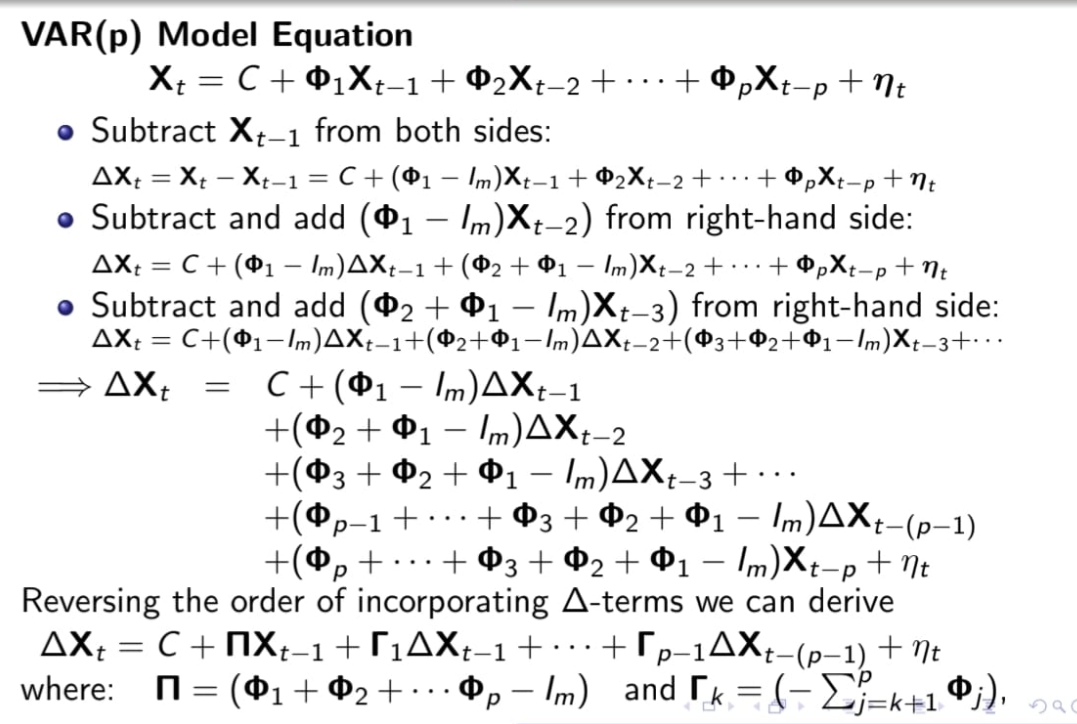

Vector error correlation models are related to vector autoregressive models (VARs) introduced in Module 6, Lesson 2. If we have three time series, $x_t$, $y_t$ and $z_t$, we can write the VAR(1) model with these three time series as follows:

$$ \begin{align*}
  x_t &= \alpha_0 + \alpha_1 x_{t-1} + \alpha_2 y_{t-1} + \alpha_3 z_{t-1} + u_t \\
  y_t &= \beta_0 + \beta_1 x_{t-1} + \beta_2 y_{t-1} + \beta_3 z_{t-1} + v_t \\
  z_t &= \gamma_0 + \gamma_1 x_{t-1} + \gamma_2 y_{t-1} + \gamma_3 z_{t-1} + w_t
\end{align*} $$


Where $u_t$, $v_t$ and $w_t$ are white noise with $0$ mean and constant variance.

Let's rewrite the VAR(1) model above in matrix form as follows: 

$$ X_t = C_0 + \Pi_0 X_{t-1} + \epsilon_t $$

Where $C_0$ is a $3 \times 1$ constant vector: 

$$ C_0 = \begin{bmatrix}
  \alpha_0 \\
  \beta_0 \\
  \gamma_0
\end{bmatrix} $$

$X_t$ is a $3 \times 1$ vector: 

$$ X_t = \begin{bmatrix}
  x_t \\
  y_t\\
  z_t
\end{bmatrix} $$

$\Pi_0$ is a $3 \times 3$ matrix: 

$$ \Pi_0 = \begin{bmatrix}
  \alpha_1 & \alpha_2 & \alpha_3 \\
  \beta_1 & \beta_2 & \beta_3 \\
  \gamma_1 & \gamma_2 & \gamma_3 
\end{bmatrix} $$

$\epsilon_t$ is a $3 \times 1$ white noise vector: 

$$ \begin{bmatrix}
  u_t \\
  v_t \\
  w_t
\end{bmatrix} $$

We know if $x_t$, $y_t$ and $z_t$ are all stationary, we can use the above VAR(1) model. 

On the other hand, when they are not stationary, but their first differences are stationary, then we can use their first differences to model them as a VAR(1). The matrix form of the model can be written as follows:

$$ \Delta X_t = C_1 + \Pi_1 \Delta X_{t-1} + \epsilon_t $$

If $x_t$, $y_t$ and $z_t$ are not stationary but they are cointegrated, then we can adjust the above model with an error correction term. This adjusted model is called a vector error correction model (VECM). We can write the matrix form of a VEC model as follows:

$$ \Delta X_t = C + \Pi X_{t-1} + \Gamma \Delta X_{t-1} + \epsilon_t $$

In general, we need more than one lag for the difference term on the right-hand side of the equation system. We will discuss later how to find the right number of lags in the system. For now, let's assume the number of lags to be p. Hence, we can write our general VEC model as follows:

$$ \Delta X_t = C + \Pi X_{t-1} + \sum_{i=1}^{p-1} \Gamma_i \Delta X_{t-i} + \epsilon_t $$

Where 

> $C$ is the deterministic vector or matrix depending if there are constants and/or linear trend <br>
> $\Pi$ is a 3X3 matrix for coefficients of lagged $X_{t-1}$ vector <br>
> $\Gamma_i$ is a  3X3 matrix for coefficients of $\Delta X_{t-1}$ <br>
> $\epsilon_t$ is a white noise 3X1 vector with $0$ means and stable covariance <br>


The above VEC model was introduced by Johansen. The major difference between a VEC model and VAR model is the new term $\Pi X_{t-1}$ in the VEC model. <u> $\Pi X_{t-1}$ is the error correction term for a VEC model. </u> **This error correction term in a VEC model is the <u> long-term equilibrium </u> part of the model.** $\sum_{i=1}^{p-1}\Gamma_i\Delta X_{t-i}$ is the short-term movement part of the VEC model. Hence, VEC model can be used to analyze both long-term and short-term dynamics of cointegrated nonstationary $I(1)$ time series variables. We still assume $x_t$, $y_t$ and $z_t$ are $I(1)$.

Let's focus on the coefficient matrix $\Pi$ for now. We can interpret $\Pi$ as following three scenarios:

**a. The rank of $\Pi$ is $0$**

If $\Pi = 0$, that is all elements of $\Pi$ are $0$, or the rank of $\Pi$ is $0$, then there are no cointegrations among $x_t$, $y_t$ and $z_t$. If all time series are $I(1)$, the VECM will reduce to a VAR($p$) model with the first differences of all time series.

**b. The rank of $\Pi$ is full rank $K$**

If $\Pi$ has full rank $K$, (the diagonal elements of the matrix are all non-zero, in our case, $K= 3$, because we have 3 time series), then $x_t$, $y_t$ and $z_t$ are stationary. There are no unit roots from all time series. We can apply the original levels of these time series to a VAR($p$) model with no need to use a VEC model. This situation should not happen as we usually assume $x_t$, $y_t$, and $z_t$ are $I(1)$.

**c. The rank of $\Pi$ is between $0$ and $K$**

If the rank of $\Pi$ is $m$ and $0 < m < K $, it means $\Pi$ has reduced rank. This is the case with cointegration. $\Pi$ can be split into two terms as follows:

$$ \Pi = \alpha \beta' $$

Where $\Pi$ is a $K \times K$ matrix, $\alpha$ is a $K \times m$ matrix, and $\beta$ is a $K \times m$ matrix.

The columns of $\beta$ matrix contain the $m$ co-integrating vectors, and the columns of $\alpha$ contain the m adjustment vectors. $Rank(\Pi) = Rank(\alpha) = Rank(\beta) =m$. Co-integrating vectors include coefficients of a linear combination of co-integrating time series. There are $m$ linear combinations from all time series that are stationary. Hence, there are $(k-m)$ unit roots from all time series.

Adjustment vectors contain the coefficients that can bring the short-term deviation of the time series back to their long-term equilibrium relationship. The coefficients in adjustment vectors are error correction coefficients. Therefore, $\Pi$ corrects the error gap that happened in the last period and brings short-term disequilibrium among time series back to their long-term equilibrium. 

Now we know that when we have multiple non-stationary co-integrating time series, we should use a VEC model. However, how do we test multiple non-stationary time series for cointegration? This will be the topic of our next section.



## **3. Johansen Cointegration Test**

There are two types of sequential tests proposed by Johansen to test cointegration for multiple time series: trace test and maximum eigenvalue test. They are both likelihood-ratio tests. Both tests run a series of tests on the rank of $\Pi$ we discussed in the last section to decide the number of cointegration relationships in a time series vector. <u> These two tests have the same null hypothesis. </u> The difference is the alternative hypothesis. Let's use the following example to explain how the two tests work.
